In [1]:
import pandas as pd
from ipynb.fs.defs.first import get_novel, write_dataset, plot
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

fp_confirmed = "./novel-corona-virus-2019-dataset/new_data.csv"
new_data = pd.read_csv(fp_confirmed)

fp_deaths = "./novel-corona-virus-2019-dataset/time_series_covid19_deaths_global.csv"
deaths = get_novel(fp_deaths)
deaths = deaths.set_index('Country/Region')

In [2]:
header = [i for i in range(new_data.shape[1]-1)]
header.insert(0, 'country')
new_deaths = pd.DataFrame(columns=header)
new_confirm = new_data.set_index('country')

for ind, nd in new_confirm.iterrows():
    minus_one = 0
    for h in new_confirm.columns:
        if nd[h] == -1:
            break
        minus_one +=1
    if minus_one < len(new_confirm.columns):
        new_deaths_row = list(deaths.loc[ind])[len(new_confirm.columns) - minus_one:]
        for j in range(len(new_confirm.columns) - minus_one):
            new_deaths_row.append(-1)
    else:
        new_deaths_row = list(deaths.loc[ind])
    new_deaths_row.insert(0, ind)
    new_deaths_row = pd.DataFrame([new_deaths_row], columns=header)
    new_deaths = new_deaths.append(new_deaths_row, ignore_index=True)

filepath_new_deaths_csv = "./novel-corona-virus-2019-dataset/new_deaths.csv"
write_dataset(new_deaths, filepath_new_deaths_csv)

new_deaths = new_deaths.set_index('country')

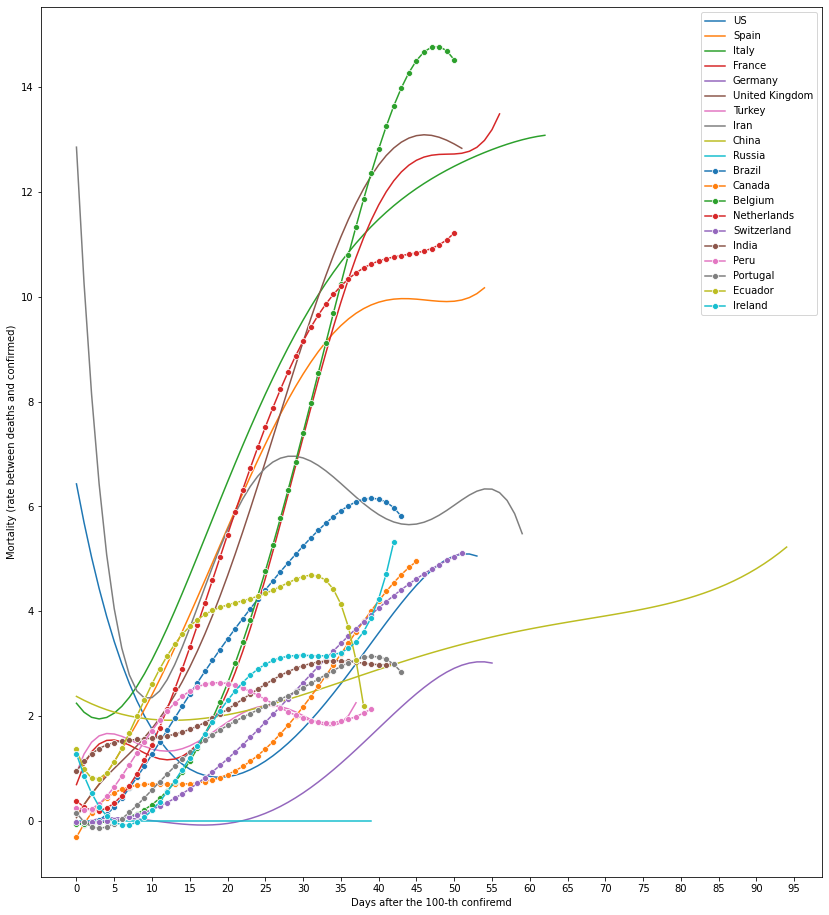

In [3]:
from ipynb.fs.defs.first import plot_smooth
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
DEGREE = 5

# prepare old and new data
new_deaths = new_deaths.astype(int)
new_confirm = new_confirm.astype(int)
header = new_confirm.columns
header = header.insert(0, 'country')
new_rateo = pd.DataFrame(columns=header)

for i in range(new_confirm.shape[0]):
    rateo = np.array(new_deaths.iloc[i])/np.array(new_confirm.iloc[i])*100
    rateo = np.where(rateo==100, -1, rateo)
    rateo = rateo.tolist()
    rateo.insert(0, new_confirm.index[i])
    row = pd.DataFrame([rateo], columns=header)
    new_rateo = new_rateo.append(row, ignore_index=True)
    
# plot
new_rateo = new_rateo.set_index('country')
new_rateo = new_rateo.astype(int)
fig = plt.figure(figsize=(14,16))
plt.xlabel("Days after the 100-th confiremd")
plt.ylabel("Mortality (rate between deaths and confirmed)")
plt.xticks(np.arange(0, len(new_data.columns), step=5))
plot_smooth(new_rateo, DEGREE)

In [4]:
from ipynb.fs.defs.first import prepare_population, prepare_new_data, plot, compute_rate, plot_smooth
filepath_population = "./API_SP.POP.TOTL_DS2_en_csv_v2_887275/API_SP.POP.TOTL_DS2_en_csv_v2_887275.csv"
filepath_new_deaths_csv = "./novel-corona-virus-2019-dataset/new_deaths.csv"

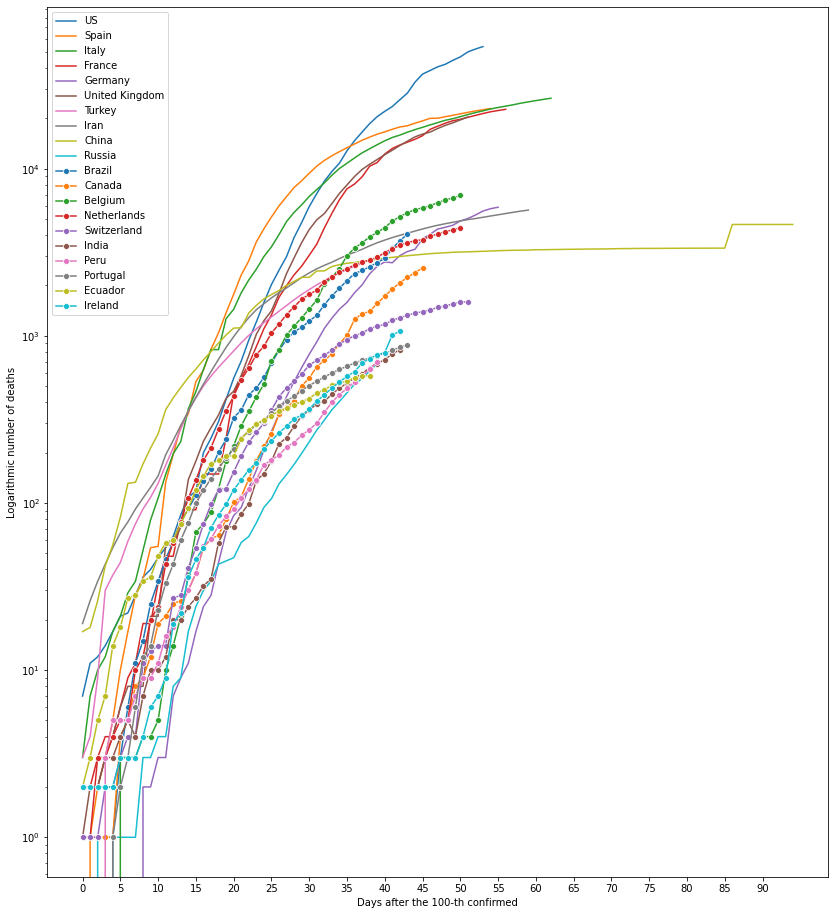

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

new_deaths = prepare_new_data(filepath_new_deaths_csv)

fig = plt.figure(figsize=(14,16))
plt.yscale('log')
plt.xlabel("Days after the 100-th confirmed")
plt.ylabel("Logarithmic number of deaths")
plt.xticks(np.arange(0, len(new_deaths.columns), step=5))
plot(new_deaths)

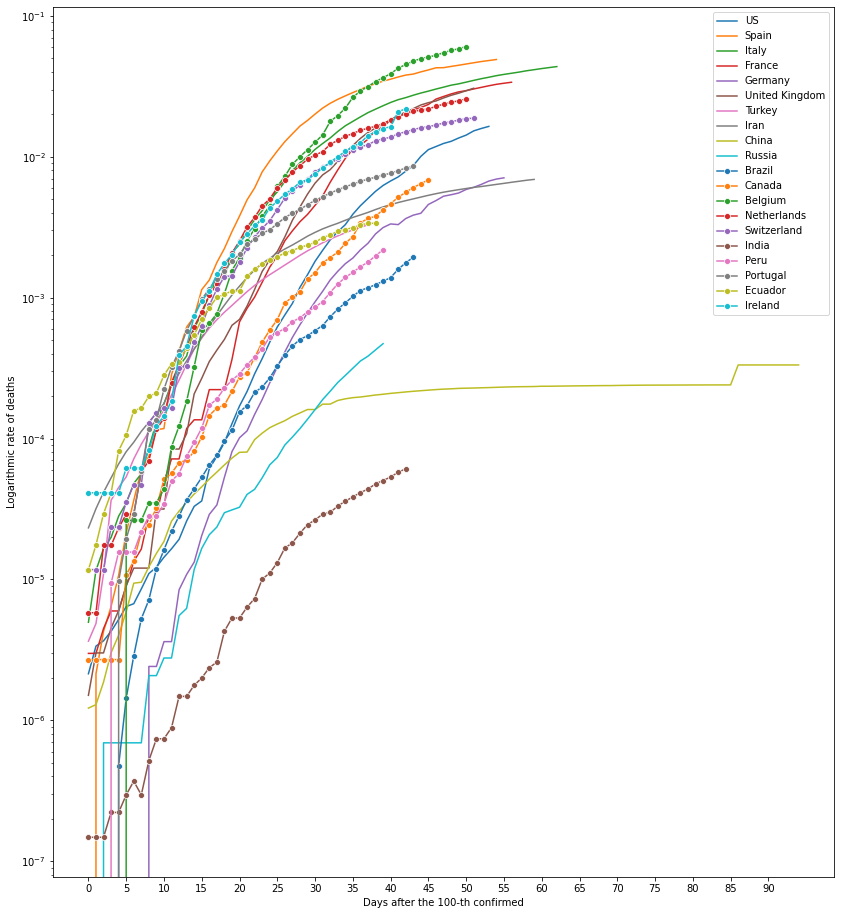

In [6]:
pop = prepare_population(filepath_population)
new_deaths = prepare_new_data(filepath_new_deaths_csv)
rate = compute_rate(new_deaths, pop)

fig = plt.figure(figsize=(14,16))
plt.yscale('log')
plt.xlabel("Days after the 100-th confirmed")
plt.ylabel("Logarithmic rate of deaths")
plt.xticks(np.arange(0, len(rate.columns), step=5))
plot(rate)